In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from trainer import *

In [2]:
%matplotlib inline
save_plot = True
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1) + 2.0
print(X_tst.shape)

cfg = unit_1x2_uniform_23_config.cfg
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(40401, 2)


In [3]:
Net = unit_net.Net
Generator = uniform_23_generator.Generator
Trainer = trainer.Trainer

In [4]:
net = Net(cfg, "test")
generator = Generator(cfg, 'test', X_tst)
m = Trainer(cfg, "test", net)
m.test(generator)

INFO:tensorflow:Restoring parameters from experiments/unit_1x2_uniform_23/model-200000


2019-02-02 23:14:18,893:INFO:Restoring parameters from experiments/unit_1x2_uniform_23/model-200000
2019-02-02 23:14:22,780:INFO:TEST ALL-200000: t = 3.7851, Net_Loss: -2.130732, Revenue: 2.130732


In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)

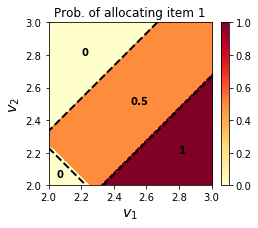

In [6]:
x1 = 4.0/3.0 + np.sqrt(4.0 + 3.0/2.0)/3.0
points1 = [(3.0 - 1.0/3.0, 3.0), (2.0, 2.0 + 1.0/3.0)]                    
points2 = [(2.0, 2 * x1 - 2.0), (2 * x1 - 2.0, 2.0)]                 
points3 = [(2.0 + 1.0/3.0, 2.0), (3.0, 3.0 - 1.0/3.0)]

x_1 = list(map(lambda x: x[0], points1))
y_1 = list(map(lambda x: x[1], points1))
x_2 = list(map(lambda x: x[0], points2))
y_2 = list(map(lambda x: x[1], points2))
x_3 = list(map(lambda x: x[0], points3))
y_3 = list(map(lambda x: x[1], points3))

plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,6))
ax.plot(x_1, y_1, linewidth = 2, linestyle = '--', color='black')
ax.plot(x_2, y_2, linewidth = 2, linestyle = '--', color='black')
ax.plot(x_3, y_3, linewidth = 2, linestyle = '--', color='black')
img = ax.imshow(alloc[::-1, :, 0], extent=[2,3,2,3], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')

plt.text(2.2, 2.8, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(2.05, 2.05, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(2.5, 2.5, s='0.5', color='black', fontsize='10', fontweight='bold')
plt.text(2.8, 2.2, s='1', color='black', fontsize='10', fontweight='bold')
                    
ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')

_ = plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

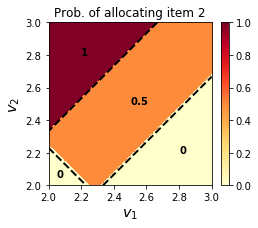

In [7]:
x1 = 4.0/3.0 + np.sqrt(4.0 + 3.0/2.0)/3.0
points1 = [(3.0 - 1.0/3.0, 3.0), (2.0, 2.0 + 1.0/3.0)]
points2 = [(2.0, 2 * x1 - 2.0), (2 * x1 - 2.0, 2.0)]
points3 = [(2.0 + 1.0/3.0, 2.0), (3.0, 3.0 - 1.0/3.0)]

x_1 = list(map(lambda x: x[0], points1))
y_1 = list(map(lambda x: x[1], points1))
x_2 = list(map(lambda x: x[0], points2))
y_2 = list(map(lambda x: x[1], points2))
x_3 = list(map(lambda x: x[0], points3))
y_3 = list(map(lambda x: x[1], points3))

plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,6))

ax.plot(x_1, y_1, linewidth = 2, linestyle = '--', color='black')
ax.plot(x_2, y_2, linewidth = 2, linestyle = '--', color='black')
ax.plot(x_3, y_3, linewidth = 2, linestyle = '--', color='black')
img = ax.imshow(alloc[::-1, :, 1], extent=[2,3,2,3], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')

plt.text(2.2, 2.8, s='1', color='black', fontsize='10', fontweight='bold')
plt.text(2.05, 2.05, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(2.5, 2.5, s='0.5', color='black', fontsize='10', fontweight='bold')
plt.text(2.8, 2.2, s='0', color='black', fontsize='10', fontweight='bold')
                    
ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 2')

_ = plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)